In [1]:
import numpy as np
import pandas as pd
import pickle 

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import scripts.load_dataset as load_dataset
import scripts.map_and_average as mapper
import scripts.classification as classification
import scripts.outliers as outliers
import scripts.utils as utils

/homes/mp305/anaconda/lib/python2.7/site-packages/librosa/core/audio.py:33: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [2]:
def limit_to_n_seconds(dataset, n_sec=30.0, win_sec=8.0):
    X, Y, Yaudio = dataset
    uniq_audio, uniq_counts = np.unique(Yaudio, return_counts=True)
    frame_sr = 2.0
    max_n_frames = np.int(np.floor((n_sec - win_sec) * frame_sr))
    X_new, Y_new, Yaudio_new = [], [], []
    for audio in uniq_audio:
        idx = np.where(Yaudio==audio)[0]
        if len(idx) > max_n_frames:
            idx = idx[:max_n_frames]
        X_new.append(X[idx, :])
        Y_new.append(Y[idx])
        Yaudio_new.append(Yaudio[idx])
    return [np.concatenate(X_new), np.concatenate(Y_new), np.concatenate(Yaudio_new)]

In [ ]:
trainset, valset, testset = mapper.load_train_val_test_sets()
trainset = limit_to_n_seconds(trainset)
valset = limit_to_n_seconds(valset)
testset = limit_to_n_seconds(testset)

In [ ]:
print np.array_equal(np.unique(trainset[1]), np.unique(valset[1]))
print np.array_equal(np.unique(testset[1]), np.unique(valset[1]))
print np.array_equal(np.unique(testset[1]), np.unique(trainset[1]))

In [2]:
OUTPUT_FILES = [output_file.split('.pickle')[0]+'_30sec.pickle' for 
                                 output_file in load_dataset.OUTPUT_FILES]
print OUTPUT_FILES

['/import/c4dm-04/mariap/train_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/val_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/test_data_melodia_8_30sec.pickle']


In [12]:
if 1:
    with open(OUTPUT_FILES[0], 'wb') as f:
        pickle.dump(trainset, f)            
    with open(OUTPUT_FILES[1], 'wb') as f:
        pickle.dump(valset, f)
    with open(OUTPUT_FILES[2], 'wb') as f:
        pickle.dump(testset, f)

In [3]:
mapper.INPUT_FILES = OUTPUT_FILES
MAPPER_OUTPUT_FILES = mapper.OUTPUT_FILES
mapper.OUTPUT_FILES = [output_file.split('.pickle')[0]+'_30sec.pickle' for 
                                 output_file in MAPPER_OUTPUT_FILES]
print mapper.INPUT_FILES, mapper.OUTPUT_FILES

['/import/c4dm-04/mariap/train_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/val_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/test_data_melodia_8_30sec.pickle'] ['/import/c4dm-04/mariap/lda_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/pca_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/nmf_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/ssnmf_data_melodia_8_30sec.pickle', '/import/c4dm-04/mariap/na_data_melodia_8_30sec.pickle']


In [ ]:
print "mapping..."
#_, _, ldadata_list, _, _, Y, Yaudio = mapper.lda_map_and_average_frames(min_variance=0.99)
#mapper.write_output([], [], ldadata_list, [], [], Y, Yaudio)
data_list, pcadata_list, ldadata_list, nmfdata_list, ssnmfdata_list, classlabs, audiolabs = mapper.map_and_average_frames(min_variance=0.99)
mapper.write_output(data_list, pcadata_list, ldadata_list, nmfdata_list, ssnmfdata_list, classlabs, audiolabs)

mapping...
(209292, 840) (70087, 840) (69766, 840)
mapping rhy
training with PCA transform...
variance explained 1.0
138 400
training with PCA transform...
variance explained 0.989994197011
training with LDA transform...


/homes/mp305/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/homes/mp305/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


variance explained 1.0
training with NMF transform...
reconstruction error 6.59195506061
training with SSNMF transform...
reconstruction error 25.0727210368
transform test data...
mapping mel
training with PCA transform...
variance explained 1.0
214 240
training with PCA transform...
variance explained 0.990347897477
training with LDA transform...
variance explained 1.0
training with NMF transform...


In [4]:
df_results = classification.classify_for_filenames(file_list=mapper.OUTPUT_FILES)

/import/c4dm-04/mariap/lda_data_melodia_8_30sec.pickle


/homes/mp305/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/homes/mp305/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


KNN LDA 0.151978449974
LDA LDA 0.320669835863
SVM LDA 0.0231101788399
RF LDA 0.0750711341437
KNN LDA 0.0547390436205
LDA LDA 0.150312531138
SVM LDA 0.0787628988868
RF LDA 0.0325169847578
KNN LDA 0.0232330458268
LDA LDA 0.0702474072041
SVM LDA 0.050068706152
RF LDA 0.0221962788765
KNN LDA 0.281733731607
LDA LDA 0.198582742899
SVM LDA 0.296355560166
RF LDA 0.138929482109
KNN LDA 0.0857923493684
LDA LDA 0.107355289483
SVM LDA 0.0896098014444
RF LDA 0.0520582564401
/import/c4dm-04/mariap/pca_data_melodia_8_30sec.pickle
KNN PCA 0.140643930221
LDA PCA 0.175099072208
SVM PCA 0.0149273059799
RF PCA 0.0436883799804
KNN PCA 0.052516908106
LDA PCA 0.055028942176
SVM PCA 0.0479512645907
RF PCA 0.0293191117144
KNN PCA 0.0268729640269
LDA PCA 0.0459303318699
SVM PCA 0.0386730267598
RF PCA 0.0200505661024
KNN PCA 0.220850433533
LDA PCA 0.161502657527
SVM PCA 0.245790916558
RF PCA 0.109652967294
KNN PCA 0.0814272808267
LDA PCA 0.0839732813486
SVM PCA 0.0918638232782
RF PCA 0.0512694004704
/import/c4dm

In [5]:
print df_results.to_latex(index=False)
# sort by 'all'
df_results_sorted = df_results.sort_values(2, ascending=False, inplace=False)
df_results_sorted.head()
print df_results_sorted.to_latex(index=False)

\begin{tabular}{llrrrrr}
\toprule
     0 &    1 &         2 &         3 &         4 &         5 &         6 \\
\midrule
   LDA &  KNN &  0.151978 &  0.054739 &  0.023233 &  0.281734 &  0.085792 \\
   LDA &  LDA &  0.320670 &  0.150313 &  0.070247 &  0.198583 &  0.107355 \\
   LDA &  SVM &  0.023110 &  0.078763 &  0.050069 &  0.296356 &  0.089610 \\
   LDA &   RF &  0.075071 &  0.032517 &  0.022196 &  0.138929 &  0.052058 \\
   PCA &  KNN &  0.140644 &  0.052517 &  0.026873 &  0.220850 &  0.081427 \\
   PCA &  LDA &  0.175099 &  0.055029 &  0.045930 &  0.161503 &  0.083973 \\
   PCA &  SVM &  0.014927 &  0.047951 &  0.038673 &  0.245791 &  0.091864 \\
   PCA &   RF &  0.043688 &  0.029319 &  0.020051 &  0.109653 &  0.051269 \\
   NMF &  KNN &  0.114299 &  0.043058 &  0.028528 &  0.177820 &  0.079545 \\
   NMF &  LDA &  0.178244 &  0.058666 &  0.046366 &  0.166222 &  0.085643 \\
   NMF &  SVM &  0.016406 &  0.007813 &  0.007689 &  0.010789 &  0.011692 \\
   NMF &   RF &  0.060399 &  0.03

In [43]:
# outliers
print "detecting outliers..."
#ddf = outliers.load_metadata(Yaudio, metadata_file=load_dataset.METADATA_FILE)
#X = np.concatenate(ldadata_list, axis=1)
X, Y, Yaudio = classification.load_data_from_pickle(mapper.OUTPUT_FILES[0])
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
outliers.print_most_least_outliers_topN(df_global, N=10)

detecting outliers...
most outliers 
           Country  Outliers  N_Country  N_Outliers
136       Botswana  0.611111         90          55
72     Ivory Coast  0.600000         15           9
95            Chad  0.545455         11           6
43           Benin  0.538462         26          14
86          Gambia  0.500000         50          25
20        Pakistan  0.494505         91          45
106          Nepal  0.473684         95          45
78     El Salvador  0.454545         33          15
64      Mozambique  0.441176         34          15
135  French Guiana  0.428571         28          12
least outliers 
            Country  Outliers  N_Country  N_Outliers
1         Lithuania  0.000000         47           0
119         Denmark  0.000000         16           0
27      South Korea  0.000000         11           0
120      Kazakhstan  0.011364         88           1
31   Czech Republic  0.024390         41           1
15      Netherlands  0.029851         67           2
30  

In [46]:
X_list, Y, Yaudio = pickle.load(open(mapper.OUTPUT_FILES[0],'rb'))
feat = X_list
feat_labels = ['rhy', 'mel', 'mfc', 'chr']
tabs_feat = []
for i in range(len(feat)):
    XX = feat[i]
    df_feat, threshold, MD = outliers.get_outliers_df(XX, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_feat, N=5)

most outliers 
      Country  Outliers  N_Country  N_Outliers
43      Benin  0.500000         26          13
136  Botswana  0.488889         90          44
106     Nepal  0.421053         95          40
84     Belize  0.418605         43          18
19      Yemen  0.416667         12           5
least outliers 
                Country  Outliers  N_Country  N_Outliers
28           Tajikistan         0         19           0
119             Denmark         0         16           0
96              Uruguay         0         31           0
25   Republic of Serbia         0         16           0
27          South Korea         0         11           0
most outliers 
      Country  Outliers  N_Country  N_Outliers
117  Zimbabwe  0.533333         15           8
96    Uruguay  0.483871         31          15
68     Guinea  0.454545         11           5
63    Senegal  0.390244         41          16
86     Gambia  0.380000         50          19
least outliers 
              Country  Outliers 

In [48]:
dataset, ddf, w_dict = outliers.load_data(mapper.OUTPUT_FILES[0], '../data/metadata_BLSM_language_all.csv')
df_local = outliers.get_local_outliers_df(X, Y, w_dict)
outliers.print_most_least_outliers_topN(df_local, N=10)

/homes/mp305/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,4,5,6,7,8,10,11,12,13,14,15,16,17,19,21,22,23,24,25,26,27,29,31,35,38,39,40,41,44,45,48,55,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,93,95,96) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/homes/mp305/anaconda/lib/python2.7/site-packages/pysal/weights/weights.py:189: UserWarning: There are 21 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/homes/mp305/anaconda/lib/python2.7/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 3, 6, 26, 35, 39, 45, 52, 61, 62, 66, 77, 85, 94, 97, 98, 102, 103, 107, 110, 120, 121
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


Antigua and Barbuda
Australia
Cuba
Fiji
French Polynesia
Grenada
Iceland
Jamaica
Japan
Kiribati
Malta
New Zealand
Philippines
Puerto Rico
Republic of Serbia
Saint Lucia
Samoa
Solomon Islands
South Korea
The Bahamas
Trinidad and Tobago
328
210
194
85
388
266
309
455
365
282
197
122
206
457
298
597
354
191
193
198
263
334
812
415
44
107
366
323
450
116
150
260
230
118
389
237
274
466
147
134
86
91
574
111
296
221
261
224
190
150
139
350
268
453
192
468
266
187
275
337
179
366
211
213
428
468
164
348
328
193
197
193
166
290
196
224
111
258
295
227
252
433
305
290
183
243
63
197
274
363
113
192
258
494
299
484
198
191
174
280
735
211
221
134
125
119
151
203
229
430
311
424
337
268
175
228
175
437
284
129
366
222
66
498
400
430
187
470
298
231
272
261
239
154
22
426
332
most outliers 
         Country  Outliers  N_Country  N_Outliers
46         China  0.260000        100          26
67        Brazil  0.240000        100          24
101     Colombia  0.211111         90          19
64    Moz

In [53]:
centroids, cl_pred = outliers.get_country_clusters(X, bestncl=20)
ddf['Clusters'] = cl_pred
outliers.print_clusters_metadata(ddf, cl_pred)

\begin{tabular}{llll}
\toprule
{} &                      0 &                                      1 &                          2 \\
\midrule
0  &          (Uruguay, 19) &                      (Switzerland, 21) &              (Austria, 30) \\
1  &          (Nigeria, 17) &      (United Republic of Tanzania, 20) &               (Uganda, 29) \\
2  &           (Greece, 27) &                          (Armenia, 32) &              (Ukraine, 45) \\
3  &           (Russia, 27) &                           (Israel, 29) &           (Kazakhstan, 45) \\
4  &        (Uzbekistan, 1) &  (Democratic Republic of the Congo, 4) &              (Botswana, 5) \\
5  &         (Swaziland, 1) &                           (Senegal, 4) &                (Gambia, 5) \\
6  &  (Papua New Guinea, 9) &                         (Colombia, 12) &        (French Guiana, 16) \\
7  &   (Western Sahara, 13) &                         (Pakistan, 14) &                 (Iraq, 33) \\
8  &           (Canada, 47) &                      

In [54]:
cluster_freq = utils.get_cluster_freq_linear(X, Y, centroids)

In [55]:
cluster_freq.shape

(137, 20)

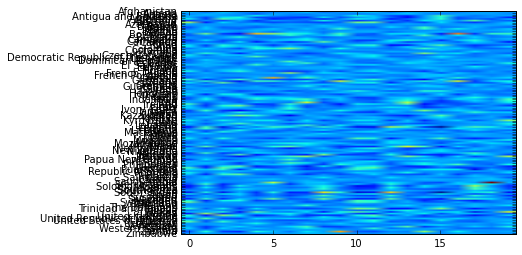

In [62]:
plt.figure()
plt.imshow(cluster_freq, aspect='auto')
plt.yticks(np.arange(len(cluster_freq)), np.unique(Y));